# Getting Dependencies

In [2]:
%%time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

Wall time: 0 ns


# Reading and Viewing Data

In [3]:
RSSI_to_Distance = pd.read_excel('RSSItoDistance.xlsx')
d1 = d = np.array(RSSI_to_Distance['Distance'])
r1 = r = np.array(RSSI_to_Distance['RSSI Value'])
d,r = np.array(d).reshape(-1,1),np.array(r).reshape(-1,1)
RSSI_to_Distance.head()


,Distance,RSSI Value
0,0.1,-24.09
1,0.2,-27.55
2,0.3,-31.73
3,0.4,-35.27
4,0.5,-33.91


# Plotting Distance against RSSI values

Text(0.5,1,'Distance Vs RSSI Values')

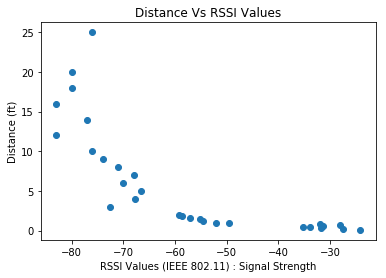

In [4]:
plt.scatter(r,d)
plt.xlabel('RSSI Values (IEEE 802.11) : Signal Strength')
plt.ylabel('Distance (ft)')
plt.title('Distance Vs RSSI Values')

# Preprocessing the values

Preprocessing Parametes: 
s1 =  [25.05]
s2 =  [12.92284798]
p =  0.01


Text(0.5,1,'Transformed Signal Strength Vs Transformed Distance')

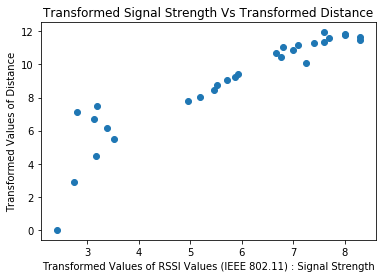

In [5]:
r = -r/10
d+=0.05
s1 = max(d)
d = (s1/d)**0.5
s2 = max(d)
p = 0.01
d = s2 - d + p

print('Preprocessing Parametes: ')
print('s1 = ',s1)
print('s2 = ',s2)
print('p = ',p)

plt.scatter(r,d)
plt.xlabel('Transformed Values of RSSI Values (IEEE 802.11) : Signal Strength')
plt.ylabel('Transformed Values of Distance')
plt.title('Transformed Signal Strength Vs Transformed Distance')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(r,d, random_state = 0) 

In [7]:
Error_Percent = {}
trained_models = {}

In [8]:
def error(x,y):
    x = np.array(x)
    y = np.array(y)    
    return np.mean((x-y)**2)**0.5*100/np.mean(x)

# Prediction using Information Entropy based Algorithms

Error =  28.371746127204563


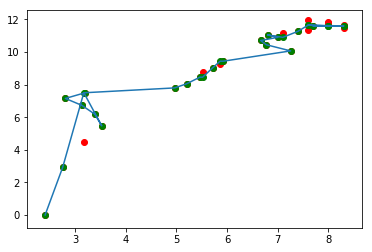

In [9]:
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
Error_Percent['Information Entropy based ML algorithms'] = error(y_test,y_pred)
y_predf = regr.predict(r)

print('Error = ',error(y_test,y_pred))

plt.scatter(r,d,c ='r')
plt.plot(r,y_predf)
plt.scatter(r,y_predf,c='g')
trained_models['Information Entropy based ML algorithms'] = regr

# Using Polynomial Regression of various degrees

 Error Percentage:  3.6358161084526 
 Degree of Polynomial:  2


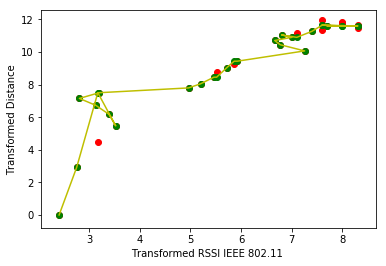

In [10]:
from sklearn.preprocessing import PolynomialFeatures

models = []
# Test upto 10 degree polynomial

for j in range(12):
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_train)
    models.append(poly_x)

from sklearn.linear_model import LinearRegression

regressors = []
y_preds = []
mses = []

for model in models:
    regressor = LinearRegression()
    regressor.fit(model,y_train)
    regressors.append(regressor)

j=0
min_mse = -1
minj = -1

for regressor in regressors:
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_test)    
    y_pred  = regressor.predict(poly_x)
    mse = error(y_test,y_pred)
    
    if(j==0):
        min_mse = mse
        minj = 0
    elif(min_mse>mse):
        min_mse = mse
        minj = j
    j+=1


print(' Error Percentage: ', min_mse, '\n' , 'Degree of Polynomial: ',minj)
Error_Percent['Polynomial_Regression'] = min_mse

#Predicted Array
poly = PolynomialFeatures(degree=minj)
poly_x = poly.fit_transform(r)    
y_pred  = regressors[minj].predict(poly_x)

plt.xlabel('Transformed RSSI IEEE 802.11 ')
plt.ylabel('Transformed Distance')
trained_models['Polynomial_Regression'] = regressors[minj]

#Scatter Plot of True Values
plt.scatter(r,d,c ='r')

#Continuous Plot of True Values
plt.plot(r,y_predf,c='y')
plt.scatter(r,y_predf,c='g')

#Final Function
Model = regressors[minj]

# Invert the Preprocessing transformations & Predict Distance based on RSSI

In [11]:
def predict(k):
    k = -k/10
    k = np.array([[k]])
    poly = PolynomialFeatures(degree=minj)
    poly_k = poly.fit_transform(k)    
    y_k  = regressors[minj].predict(poly_k)    
    dist = s1/(y_k - (p + s2))**2
    return dist

In [12]:
v = np.array([predict(i)[0][0] for i in r1])

# Analyse Results

Red dots represent True Values and Yellow Dots represent predicted Value
Accuracy =  82.07113564447108
Wall time: 21.9 ms


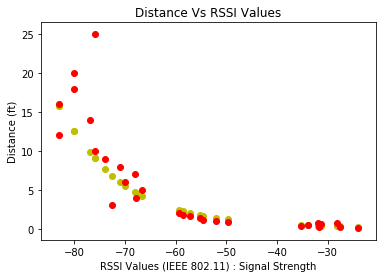

In [14]:
%%time
plt.scatter(r1,v,c='y')
plt.scatter(r1,d1,c='r')
print("Red dots represent True Values and Yellow Dots represent predicted Value")
print("Accuracy = ", 100*(1-np.mean(d1-v)/np.mean(d1)))
plt.xlabel('RSSI Values (IEEE 802.11) : Signal Strength')
plt.ylabel('Distance (ft)')
plt.title('Distance Vs RSSI Values')